<a href="https://colab.research.google.com/github/Pravallikamaddi/Py-Insights-Assignment/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving py_demo_client_extension_30_20250221075805.csv to py_demo_client_extension_30_20250221075805.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("py_demo_client_extension_30_20250221075805.csv")

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrgId             5104 non-null   object
 1   ParticipantId     5104 non-null   object
 2   DeviceId          5104 non-null   object
 3   url               5104 non-null   object
 4   eventtimeutc      5104 non-null   object
 5   transition        5104 non-null   object
 6   title             5051 non-null   object
 7   visitId           5104 non-null   int64 
 8   referringVisitId  5104 non-null   int64 
 9   eventtime         5104 non-null   object
dtypes: int64(2), object(8)
memory usage: 398.9+ KB


,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21T07:57:38.017Z,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00


In [ ]:
# Convert timestamps to datetime format
if 'eventtime' in df.columns:
    df['eventtime'] = pd.to_datetime(df['eventtime'], errors='coerce')
    df['hour'] = df['eventtime'].dt.hour
    df['day_of_week'] = df['eventtime'].dt.day_name()

In [ ]:
# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

<ipython-input-11-c4e968f8ed16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_websites.index, y=top_websites.values, palette='coolwarm')


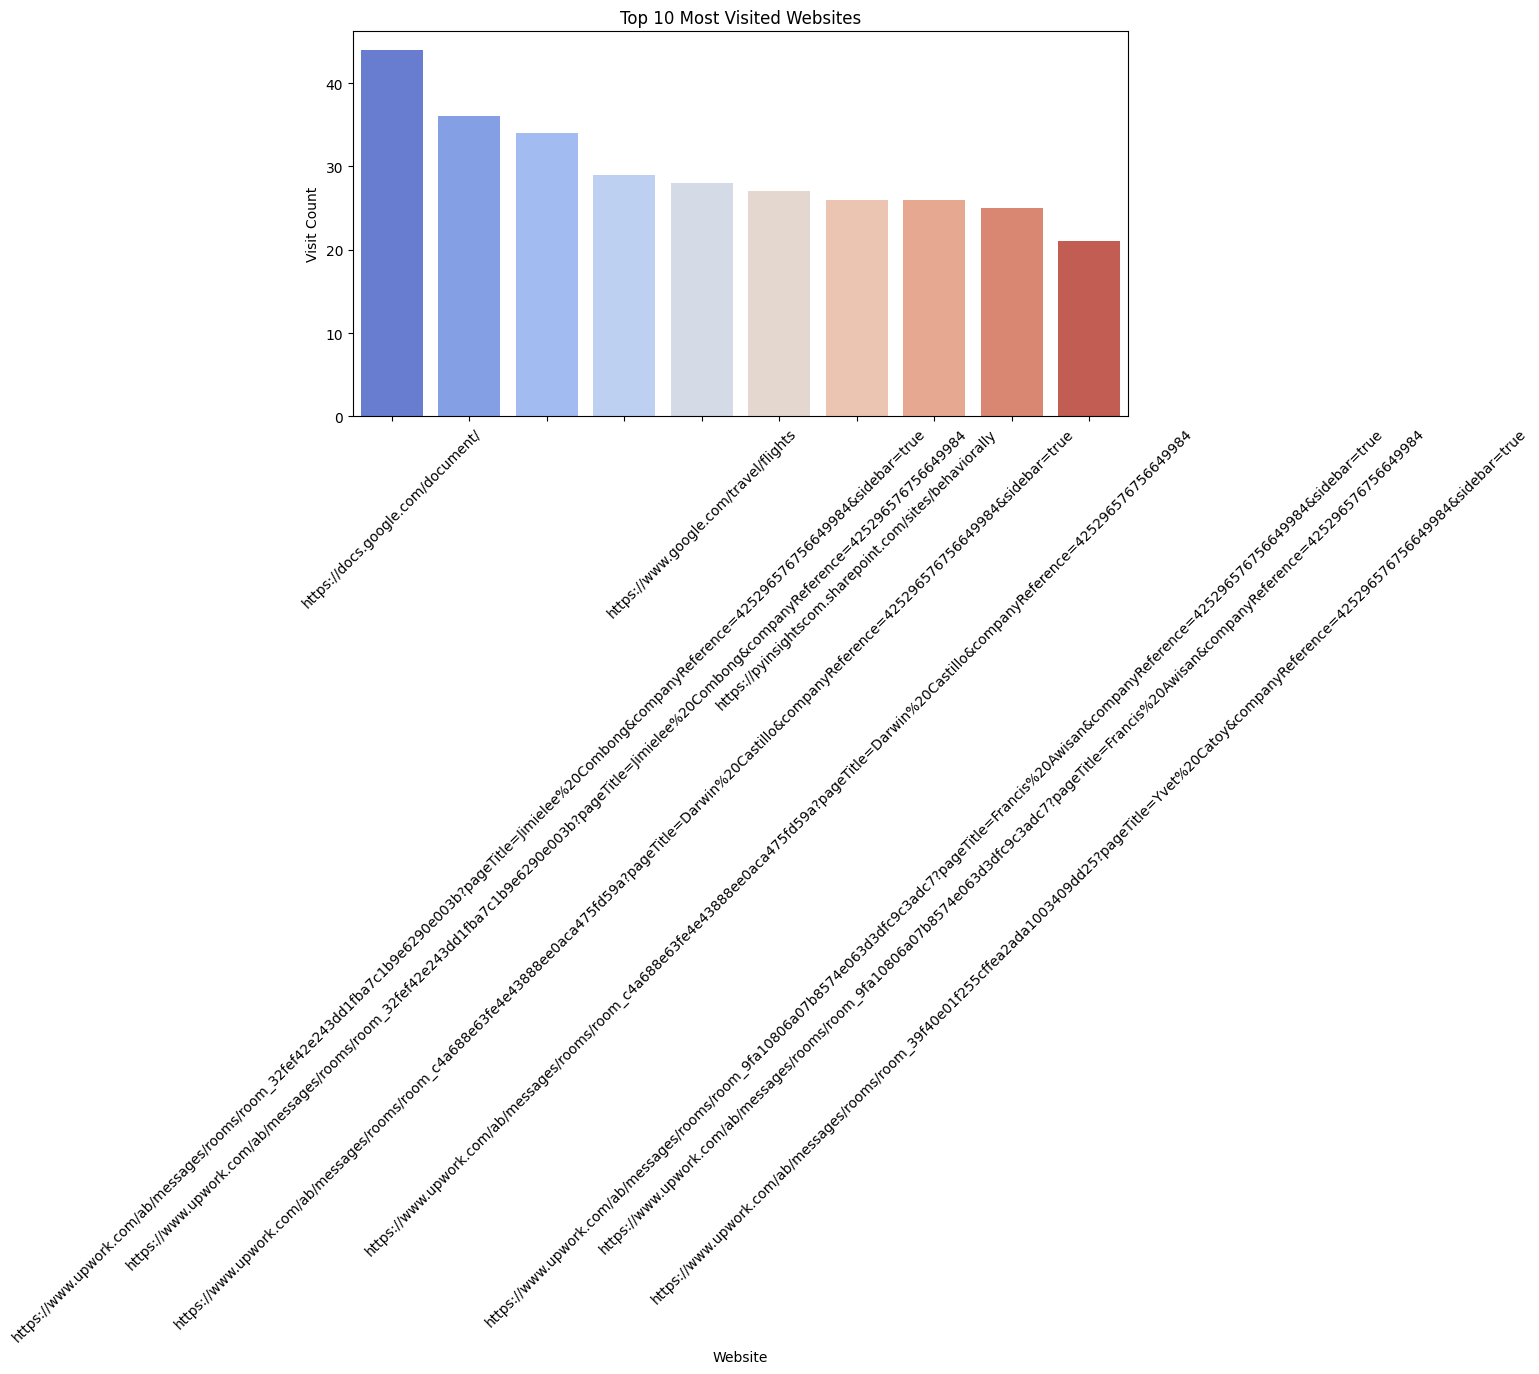

In [ ]:
# Visualization 1: Top 10 Most Visited Websites
if 'url' in df.columns:
    top_websites = df['url'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_websites.index, y=top_websites.values, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Top 10 Most Visited Websites")
    plt.xlabel("Website")
    plt.ylabel("Visit Count")
    plt.savefig("top_visited_websites.png", dpi=300, bbox_inches='tight')
    plt.show()

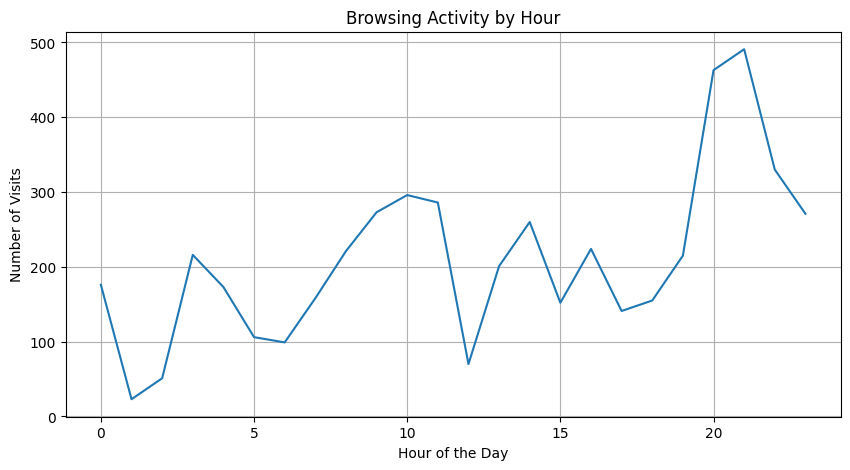

In [ ]:
# Visualization 2: Browsing Activity by Hour
if 'hour' in df.columns:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=df['hour'].value_counts().index, y=df['hour'].value_counts().values)
    plt.title("Browsing Activity by Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Visits")
    plt.grid()
    plt.savefig("top_visited_websites.png", dpi=300, bbox_inches='tight')
    plt.show()

<ipython-input-13-60a9197dbce2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')


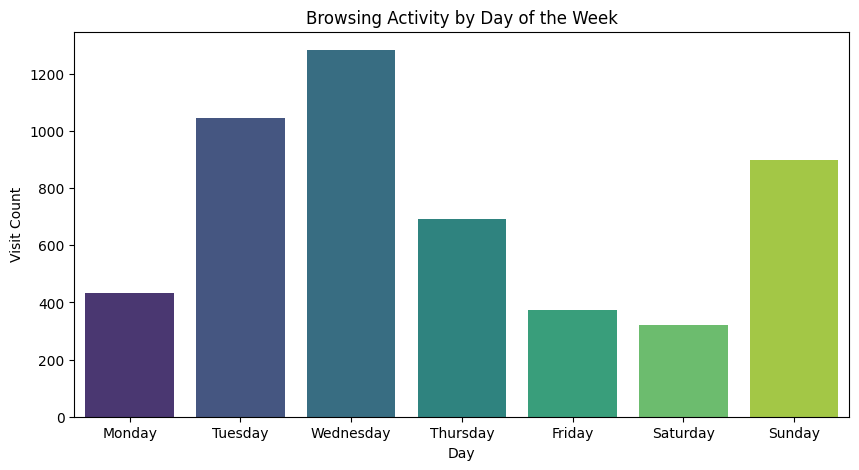

In [ ]:
# Visualization 3: Browsing Activity by Day of the Week
if 'day_of_week' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')
    plt.title("Browsing Activity by Day of the Week")
    plt.xlabel("Day")
    plt.ylabel("Visit Count")
    plt.savefig("top_visited_websites.png", dpi=300, bbox_inches='tight')
    plt.show()

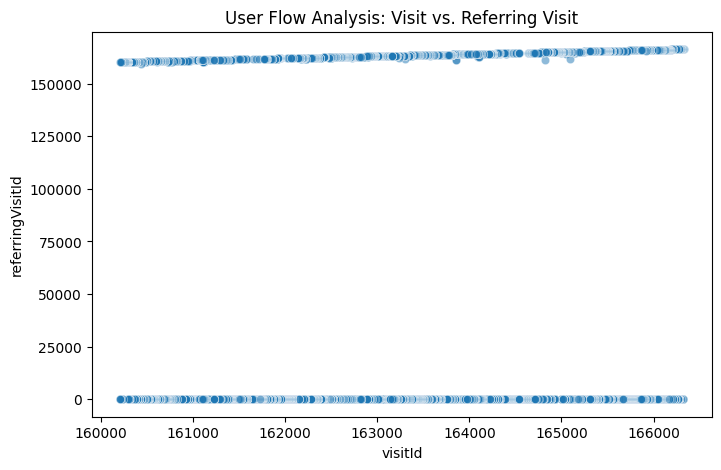

In [ ]:
# Visualization 4: User Flow Analysis (Visit vs. Referring Visit)
if 'visitId' in df.columns and 'referringVisitId' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df['visitId'], y=df['referringVisitId'], alpha=0.5)
    plt.title("User Flow Analysis: Visit vs. Referring Visit")
    plt.xlabel("visitId")
    plt.ylabel("referringVisitId")
    plt.savefig("top_visited_websites.png", dpi=300, bbox_inches='tight')
    plt.show()

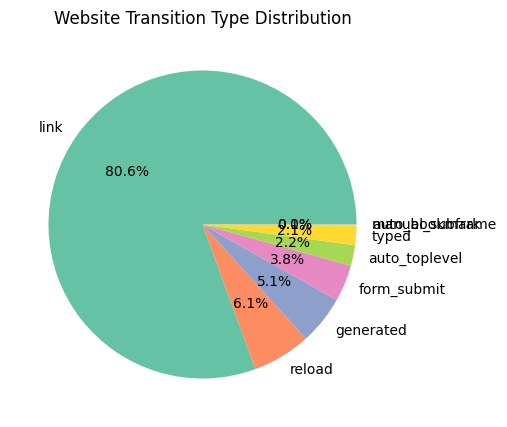

In [ ]:
# Visualization 5: Website Transition Type Distribution
if 'transition' in df.columns:
    plt.figure(figsize=(10,5))
    df['transition'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set2')
    plt.title("Website Transition Type Distribution")
    plt.ylabel("")
    plt.savefig("top_visited_websites.png", dpi=300, bbox_inches='tight')
    plt.show()